In [1]:
%matplotlib inline

# Three-armed bandit

## Simulation parameters

| $N$ | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|------|------|-----|-----|
| $10000$ | $0.4$ | $0.6$ | $0.8$ |

## The oracle value

For $N = 10000$, the theoretically maximized expectation of aggregated rewards over $N$ time slots is
$$\max \mathbb{E} \left[ \sum\limits_{t=1}^{N} r_{I(t)} \right] = \max \sum\limits_{t=1}^{N} \theta_{I(t)} = N \cdot \theta_{I^*} = 10000 \cdot 0.8 = 8000$$

## Reward function

In [2]:
from machine import get_reward

for i in [0, 1, 2, 3, 4, 0.5]:
    print('get_reward({}) returns {}'.format(i, get_reward(i)))

get_reward(0) returns -1
get_reward(1) returns 0
get_reward(2) returns 0
get_reward(3) returns 1
get_reward(4) returns -1
get_reward(0.5) returns -1


# Basic setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
number_of_repetition = 100

# $\epsilon$-greedy

In [4]:
epsilon_list = [0.1, 0.5, 0.9]

theta_hat_ndarray = np.zeros((len(epsilon_list), 3), dtype=float)
count_ndarray = np.zeros((len(epsilon_list), 3), dtype=int)
reward_ndarray = np.ndarray((len(epsilon_list), N), dtype=float)
aggregated_reward_ndarray = np.ndarray((len(epsilon_list), N), dtype=float)
average_reward_ndarray = np.ndarray((len(epsilon_list), N), dtype=float)

for index, epsilon in enumerate(epsilon_list):
    for t in range(1, N + 1):
        # Choose I randomly with probability epsilon
        if np.random.binomial(1, epsilon):
            I = np.random.randint(1, 4)
        # Get greedy with probability (1 - epsilon)
        else:
            I = np.argmax(theta_hat_ndarray[index]) + 1

        # Get the current reward
        reward = get_reward(I)

        # Store the current reward and the aggregated reward
        reward_ndarray[index][t-1] = reward
        aggregated_reward_ndarray[index][t-1] = np.sum(reward_ndarray[index][0:t])

        # Calculate the current average reward and store it
        average_reward_ndarray[index][t-1] = np.average(reward_ndarray[index][0:t])

        count_ndarray[index][I-1] += 1
        theta_hat_ndarray[index][I-1] += (reward - theta_hat_ndarray[index][I-1]) / count_ndarray[index][I-1]

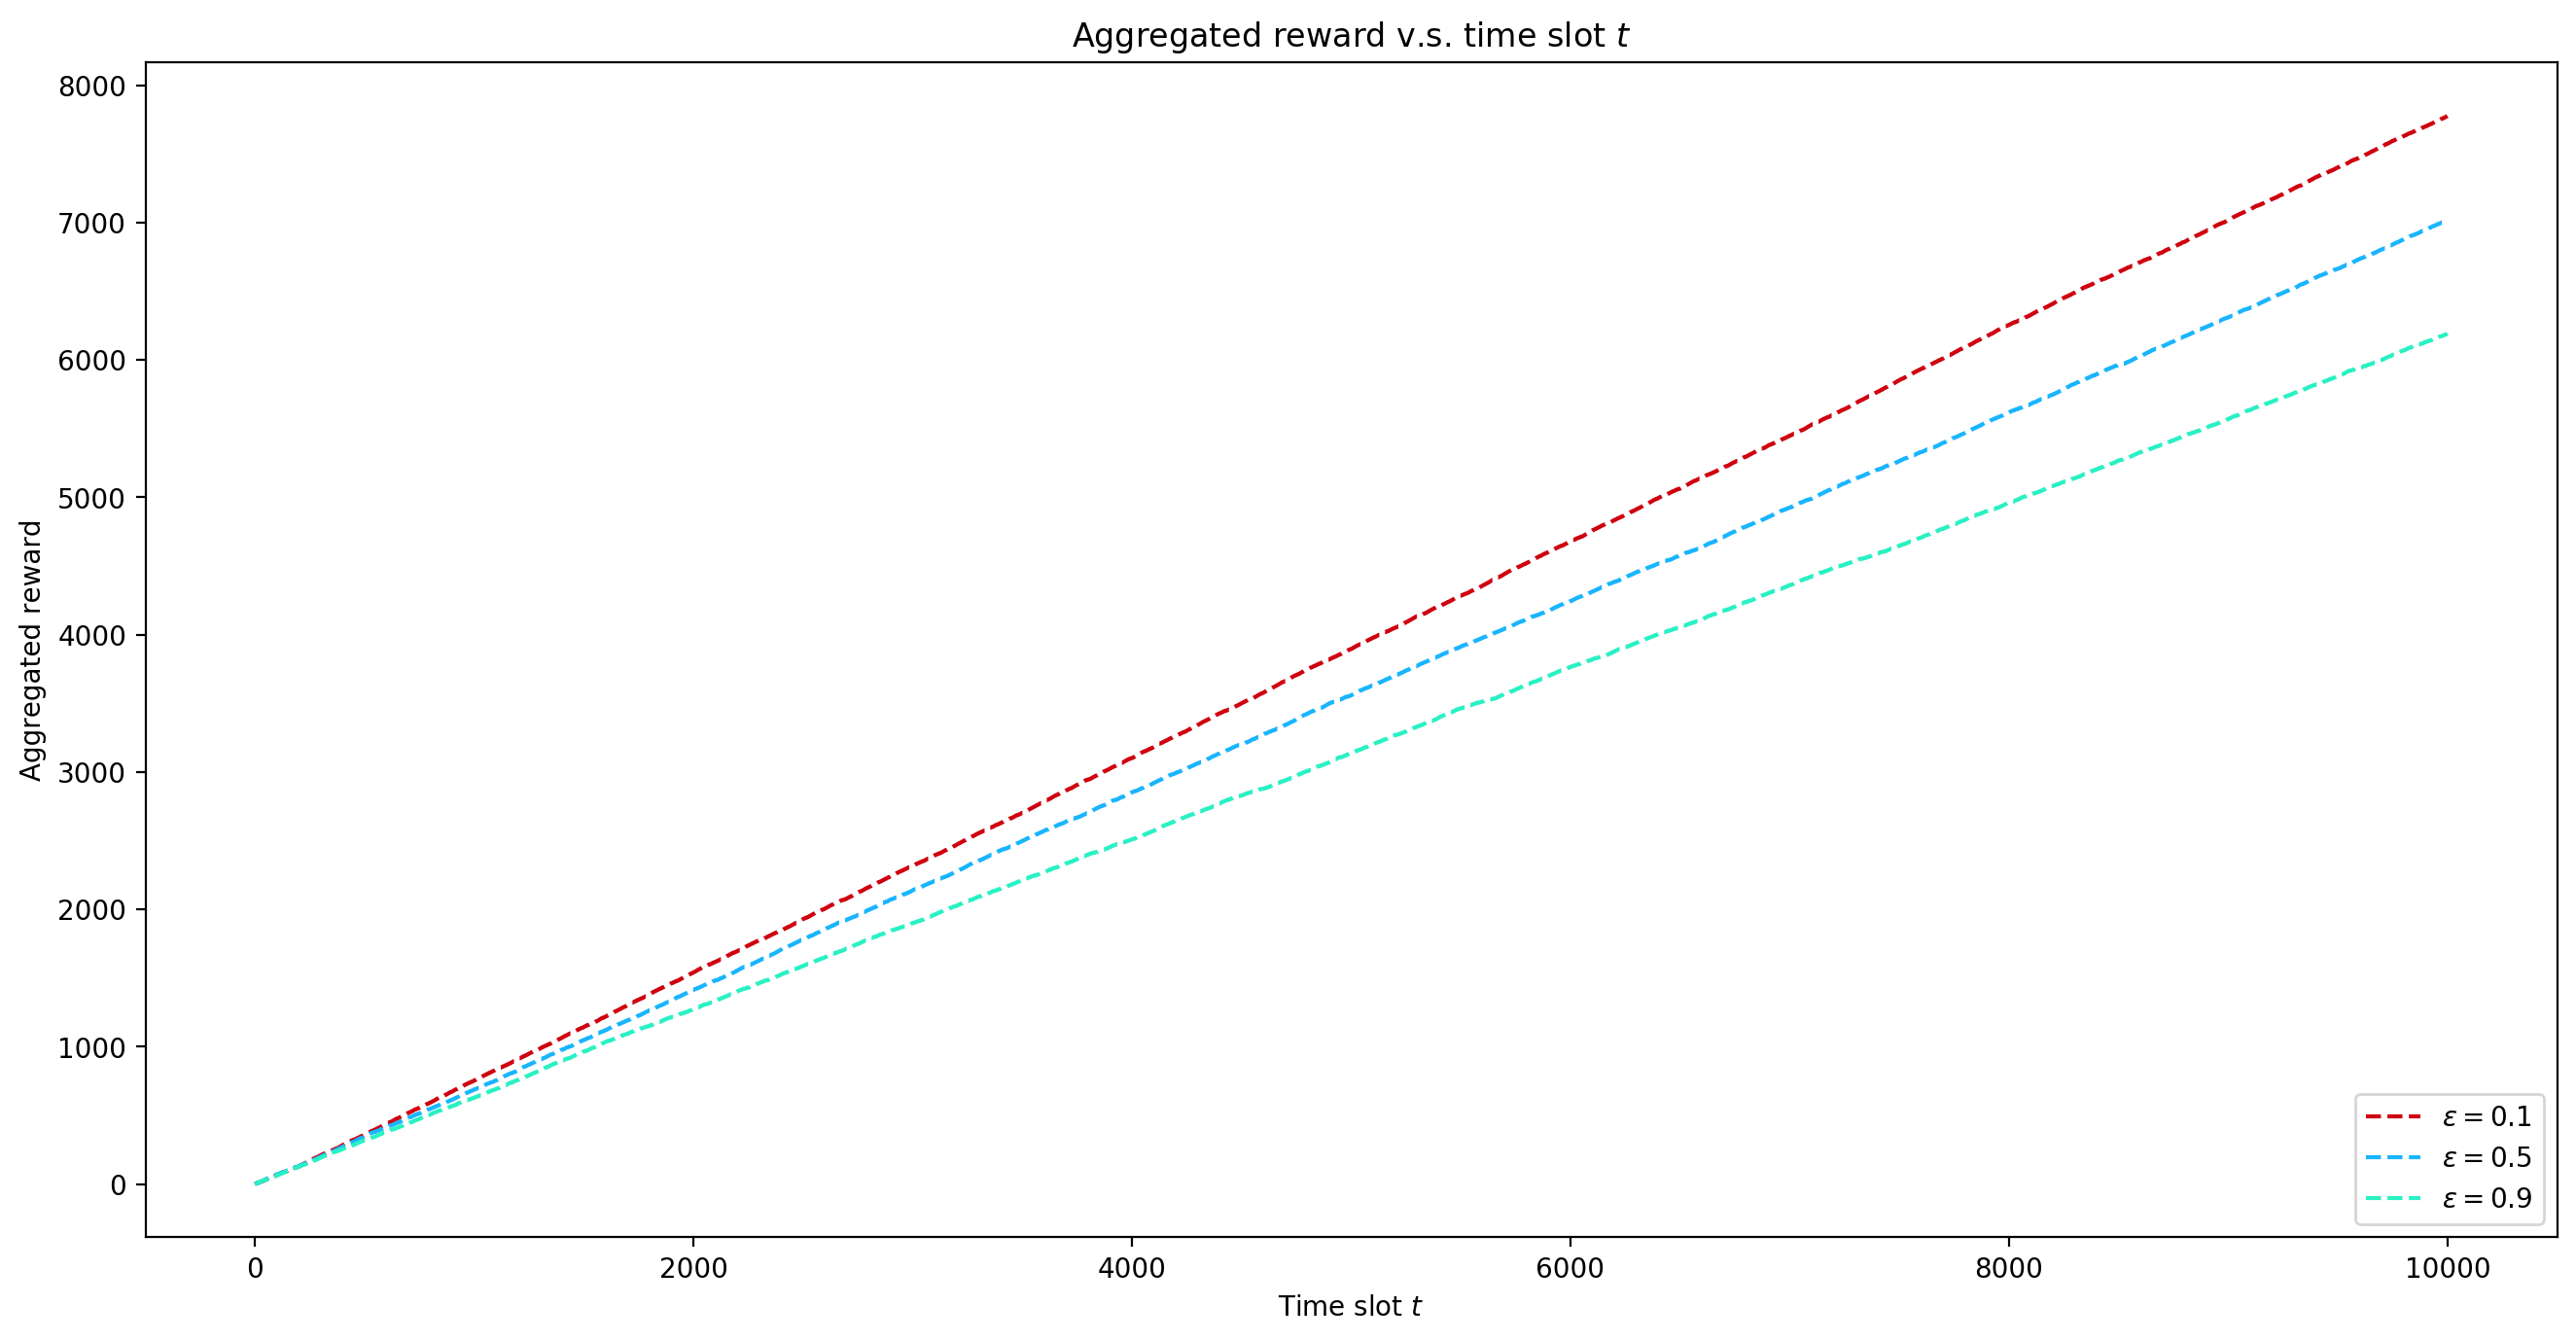

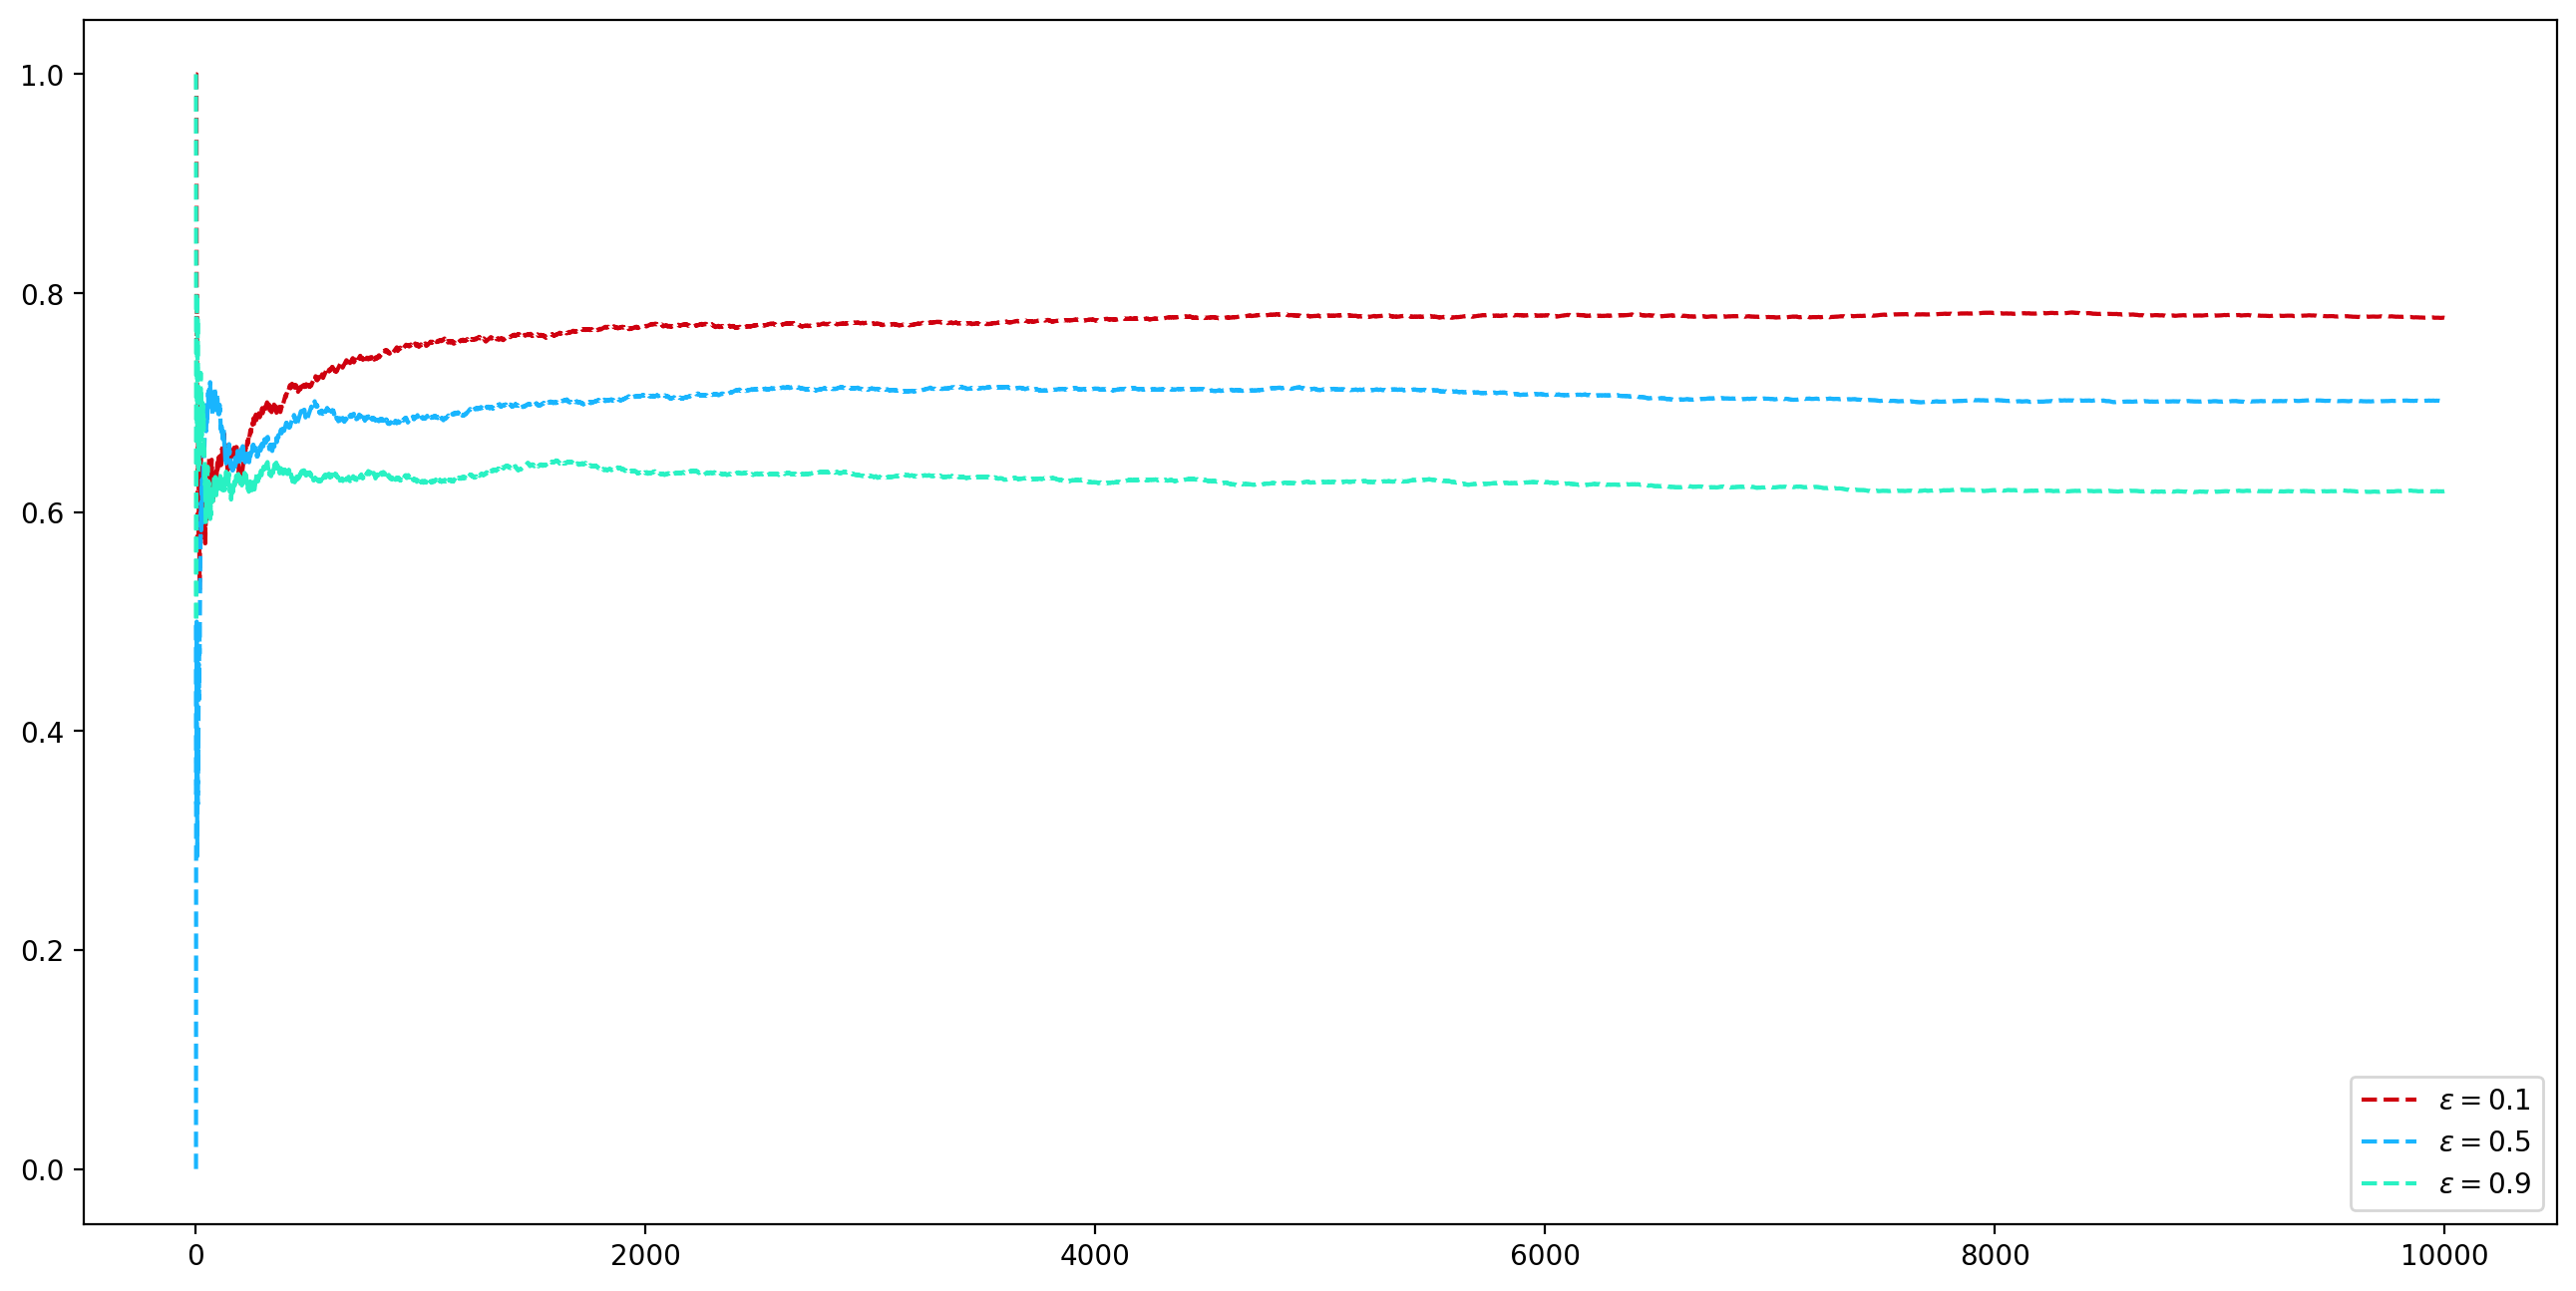

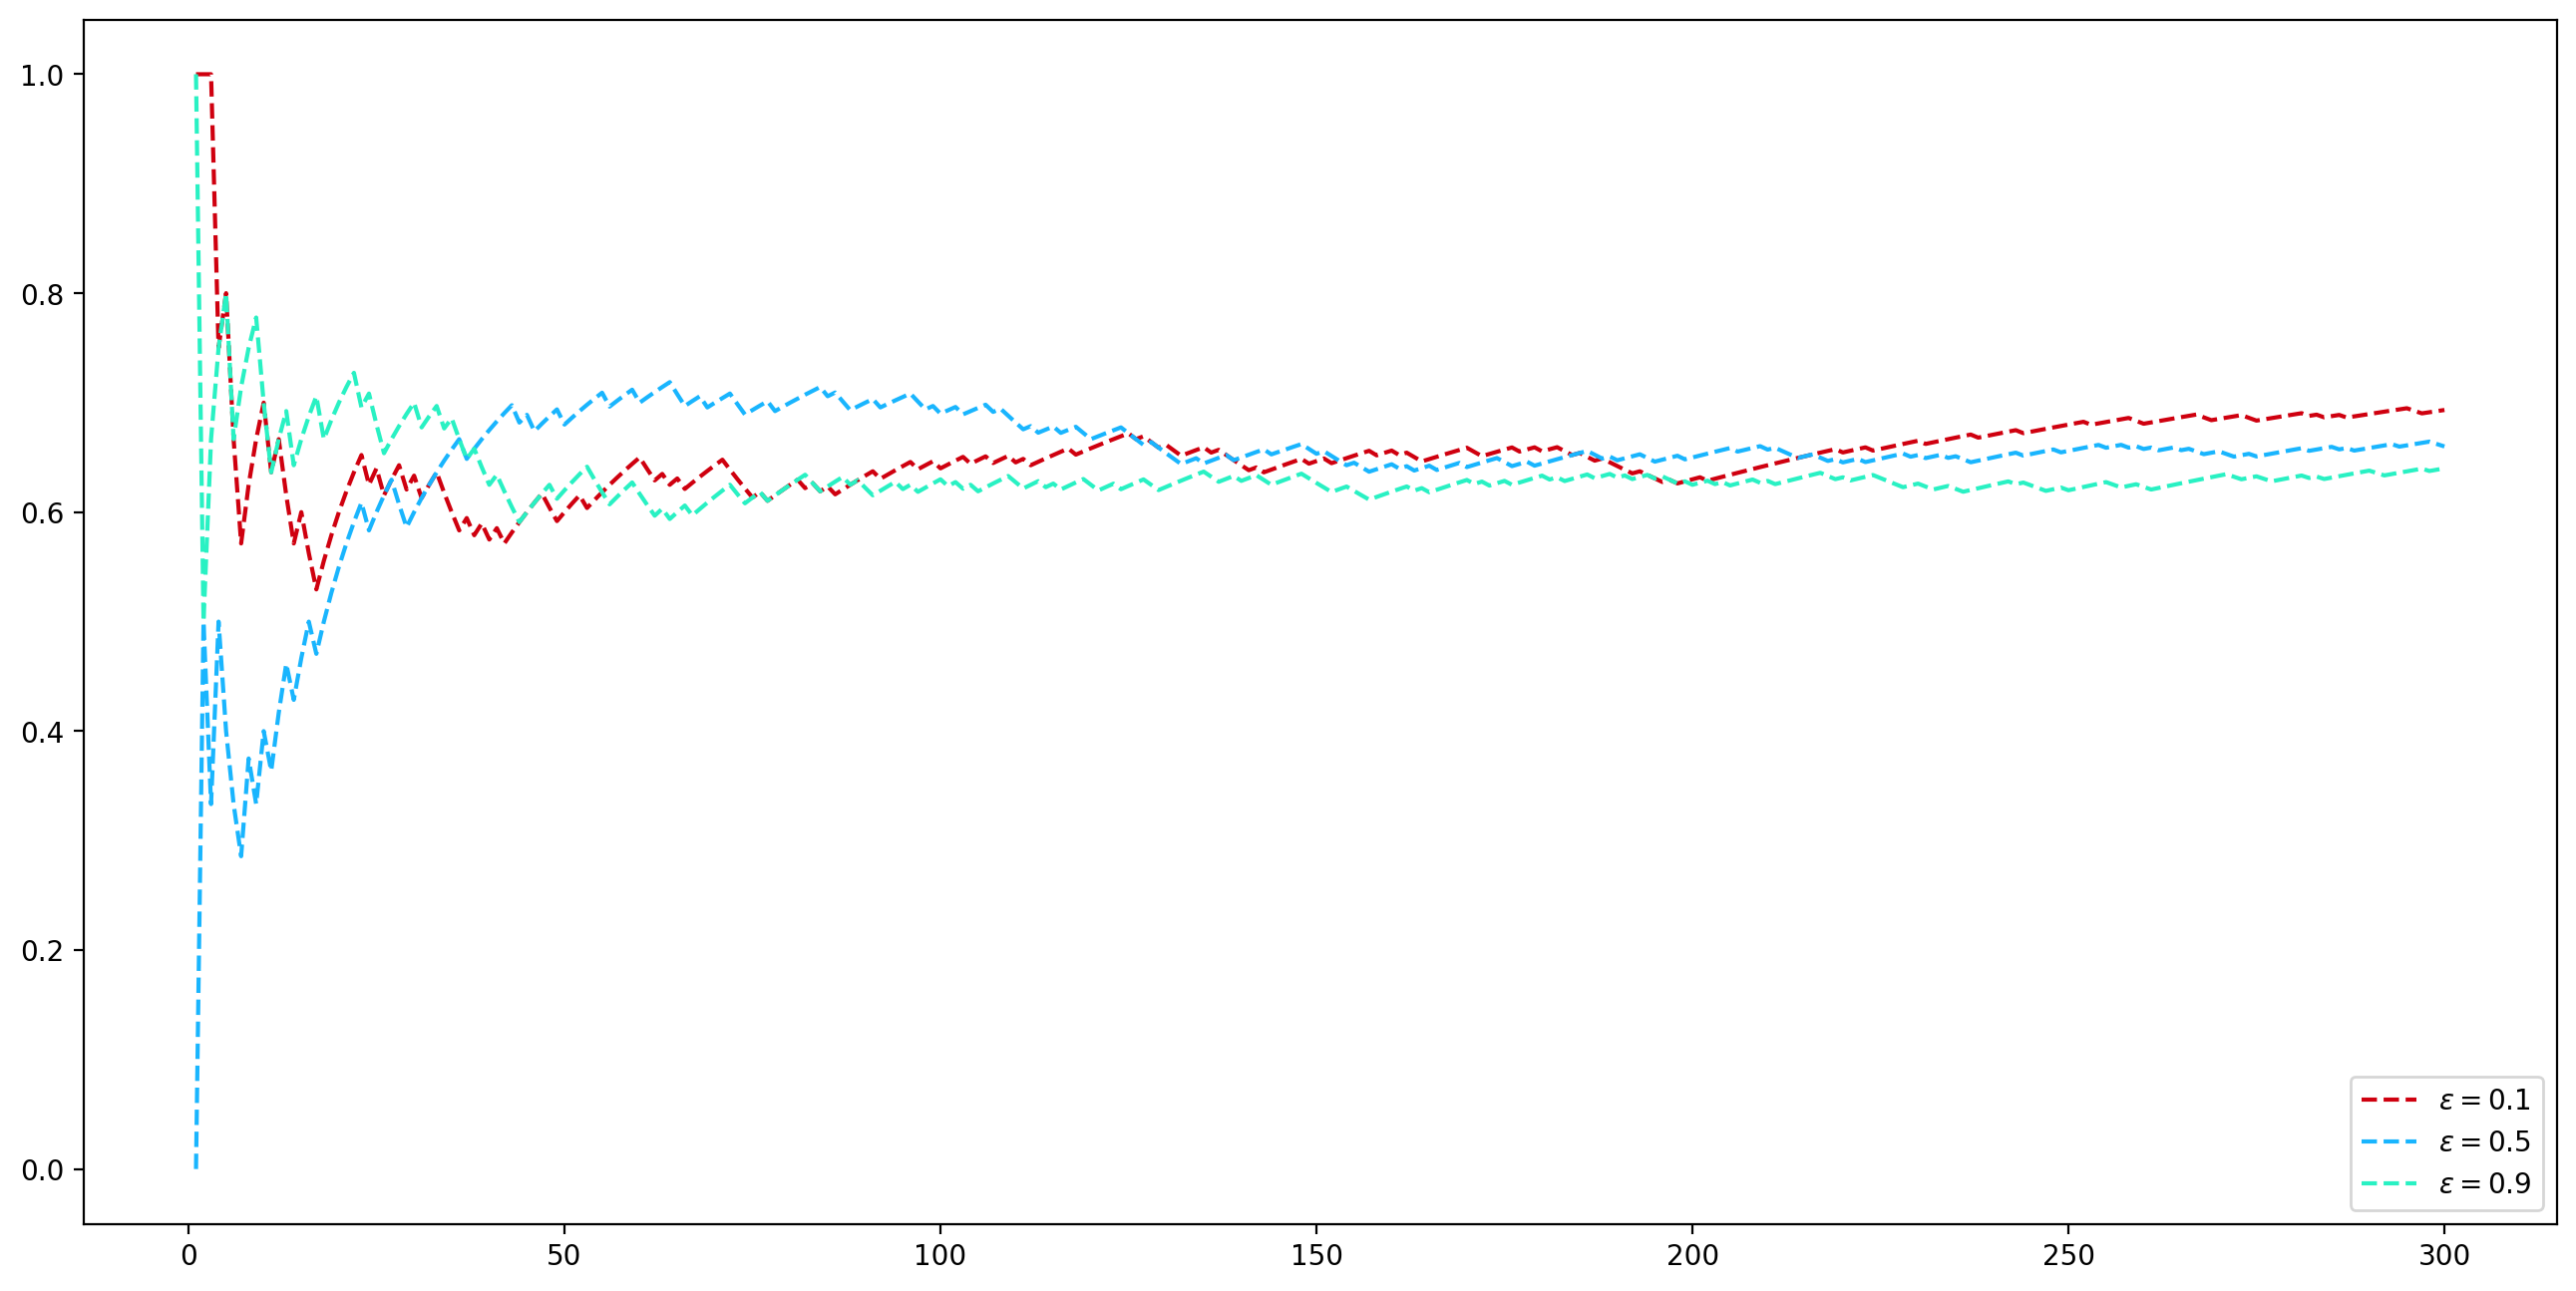

In [5]:
color_list = ['#cf000f', '#19b5fe', '#29f1c3']

fig, ax = plt.subplots(figsize=(16,8), dpi=200)
for i in range(len(epsilon_list)):
    ax.plot(range(1, N + 1), aggregated_reward_ndarray[i], '--', color=color_list[i], label='$\epsilon = {}$'.format(epsilon_list[i]))
    ax.legend(loc='lower right')
    ax.set_title('Aggregated reward v.s. time slot $t$')
    ax.set_xlabel('Time slot $t$')
    ax.set_ylabel('Aggregated reward')

fig, ax = plt.subplots(figsize=(16,8), dpi=200)
for i in range(len(epsilon_list)):
    ax.plot(range(1, N + 1), average_reward_ndarray[i], '--', color=color_list[i], label='$\epsilon = {}$'.format(epsilon_list[i]))
    ax.legend(loc='lower right')

fig, ax = plt.subplots(figsize=(16,8), dpi=200)
for i in range(len(epsilon_list)):
    ax.plot(range(1, 301), average_reward_ndarray[i][0:300], '--', color=color_list[i], label='$\epsilon = {}$'.format(epsilon_list[i]))
    ax.legend(loc='lower right')

plt.show()

# $\epsilon$-greedy simulations

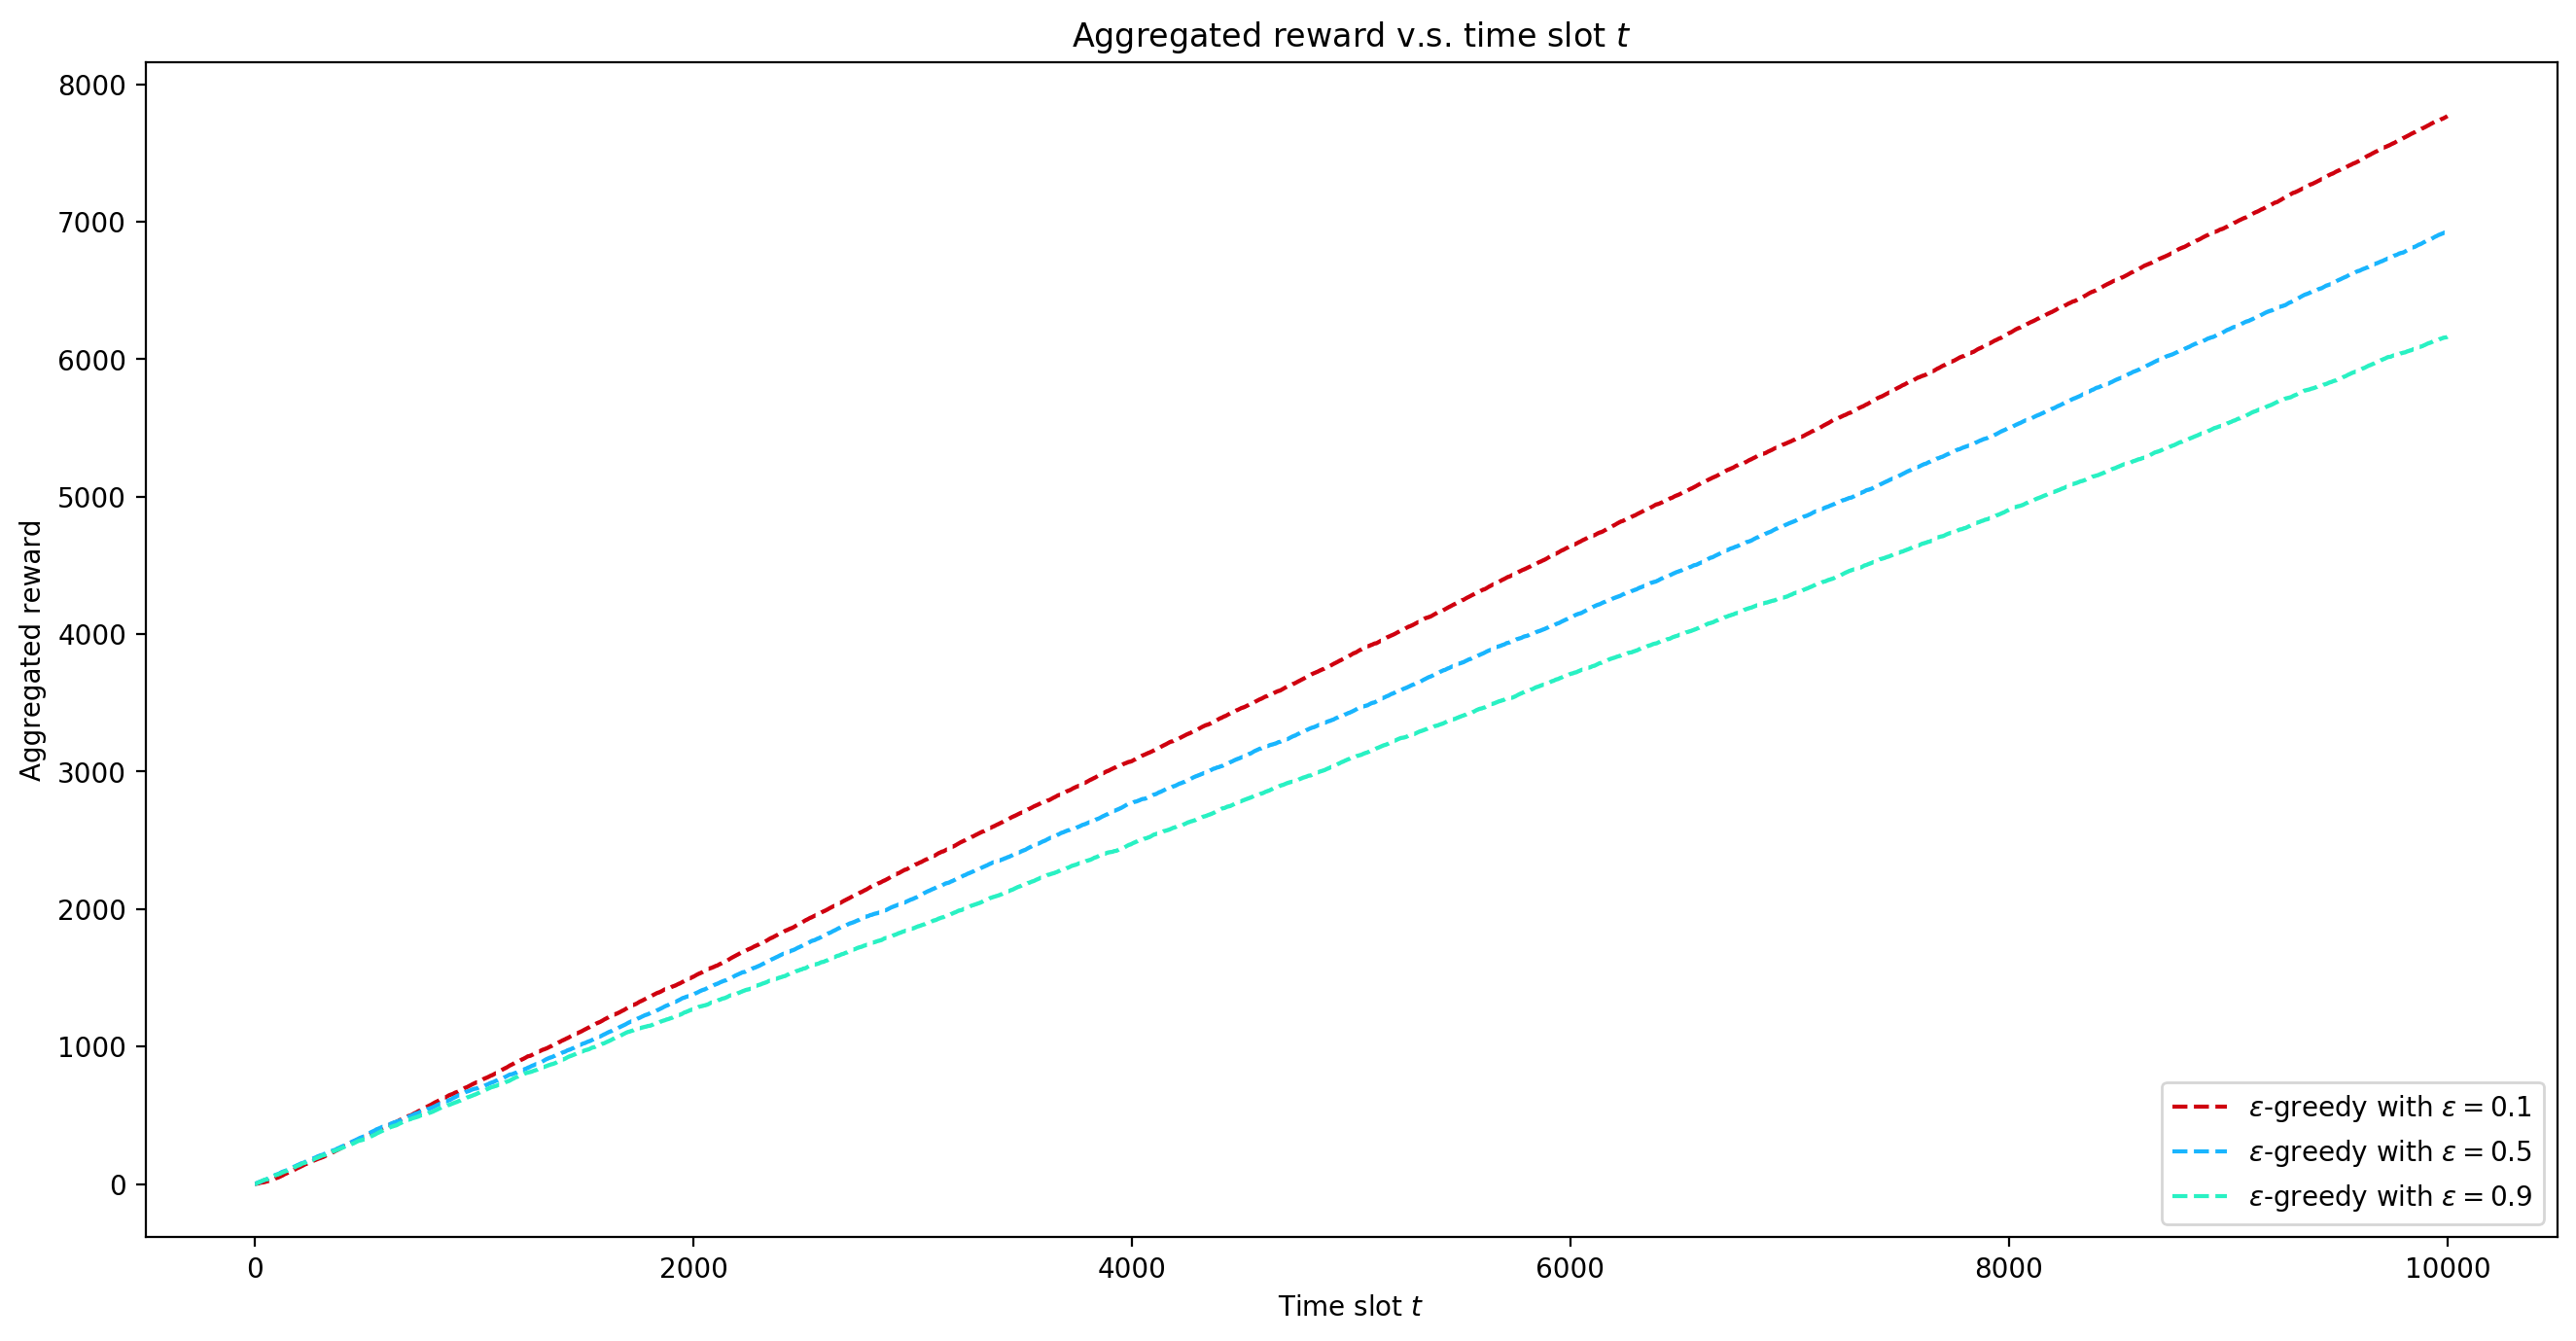

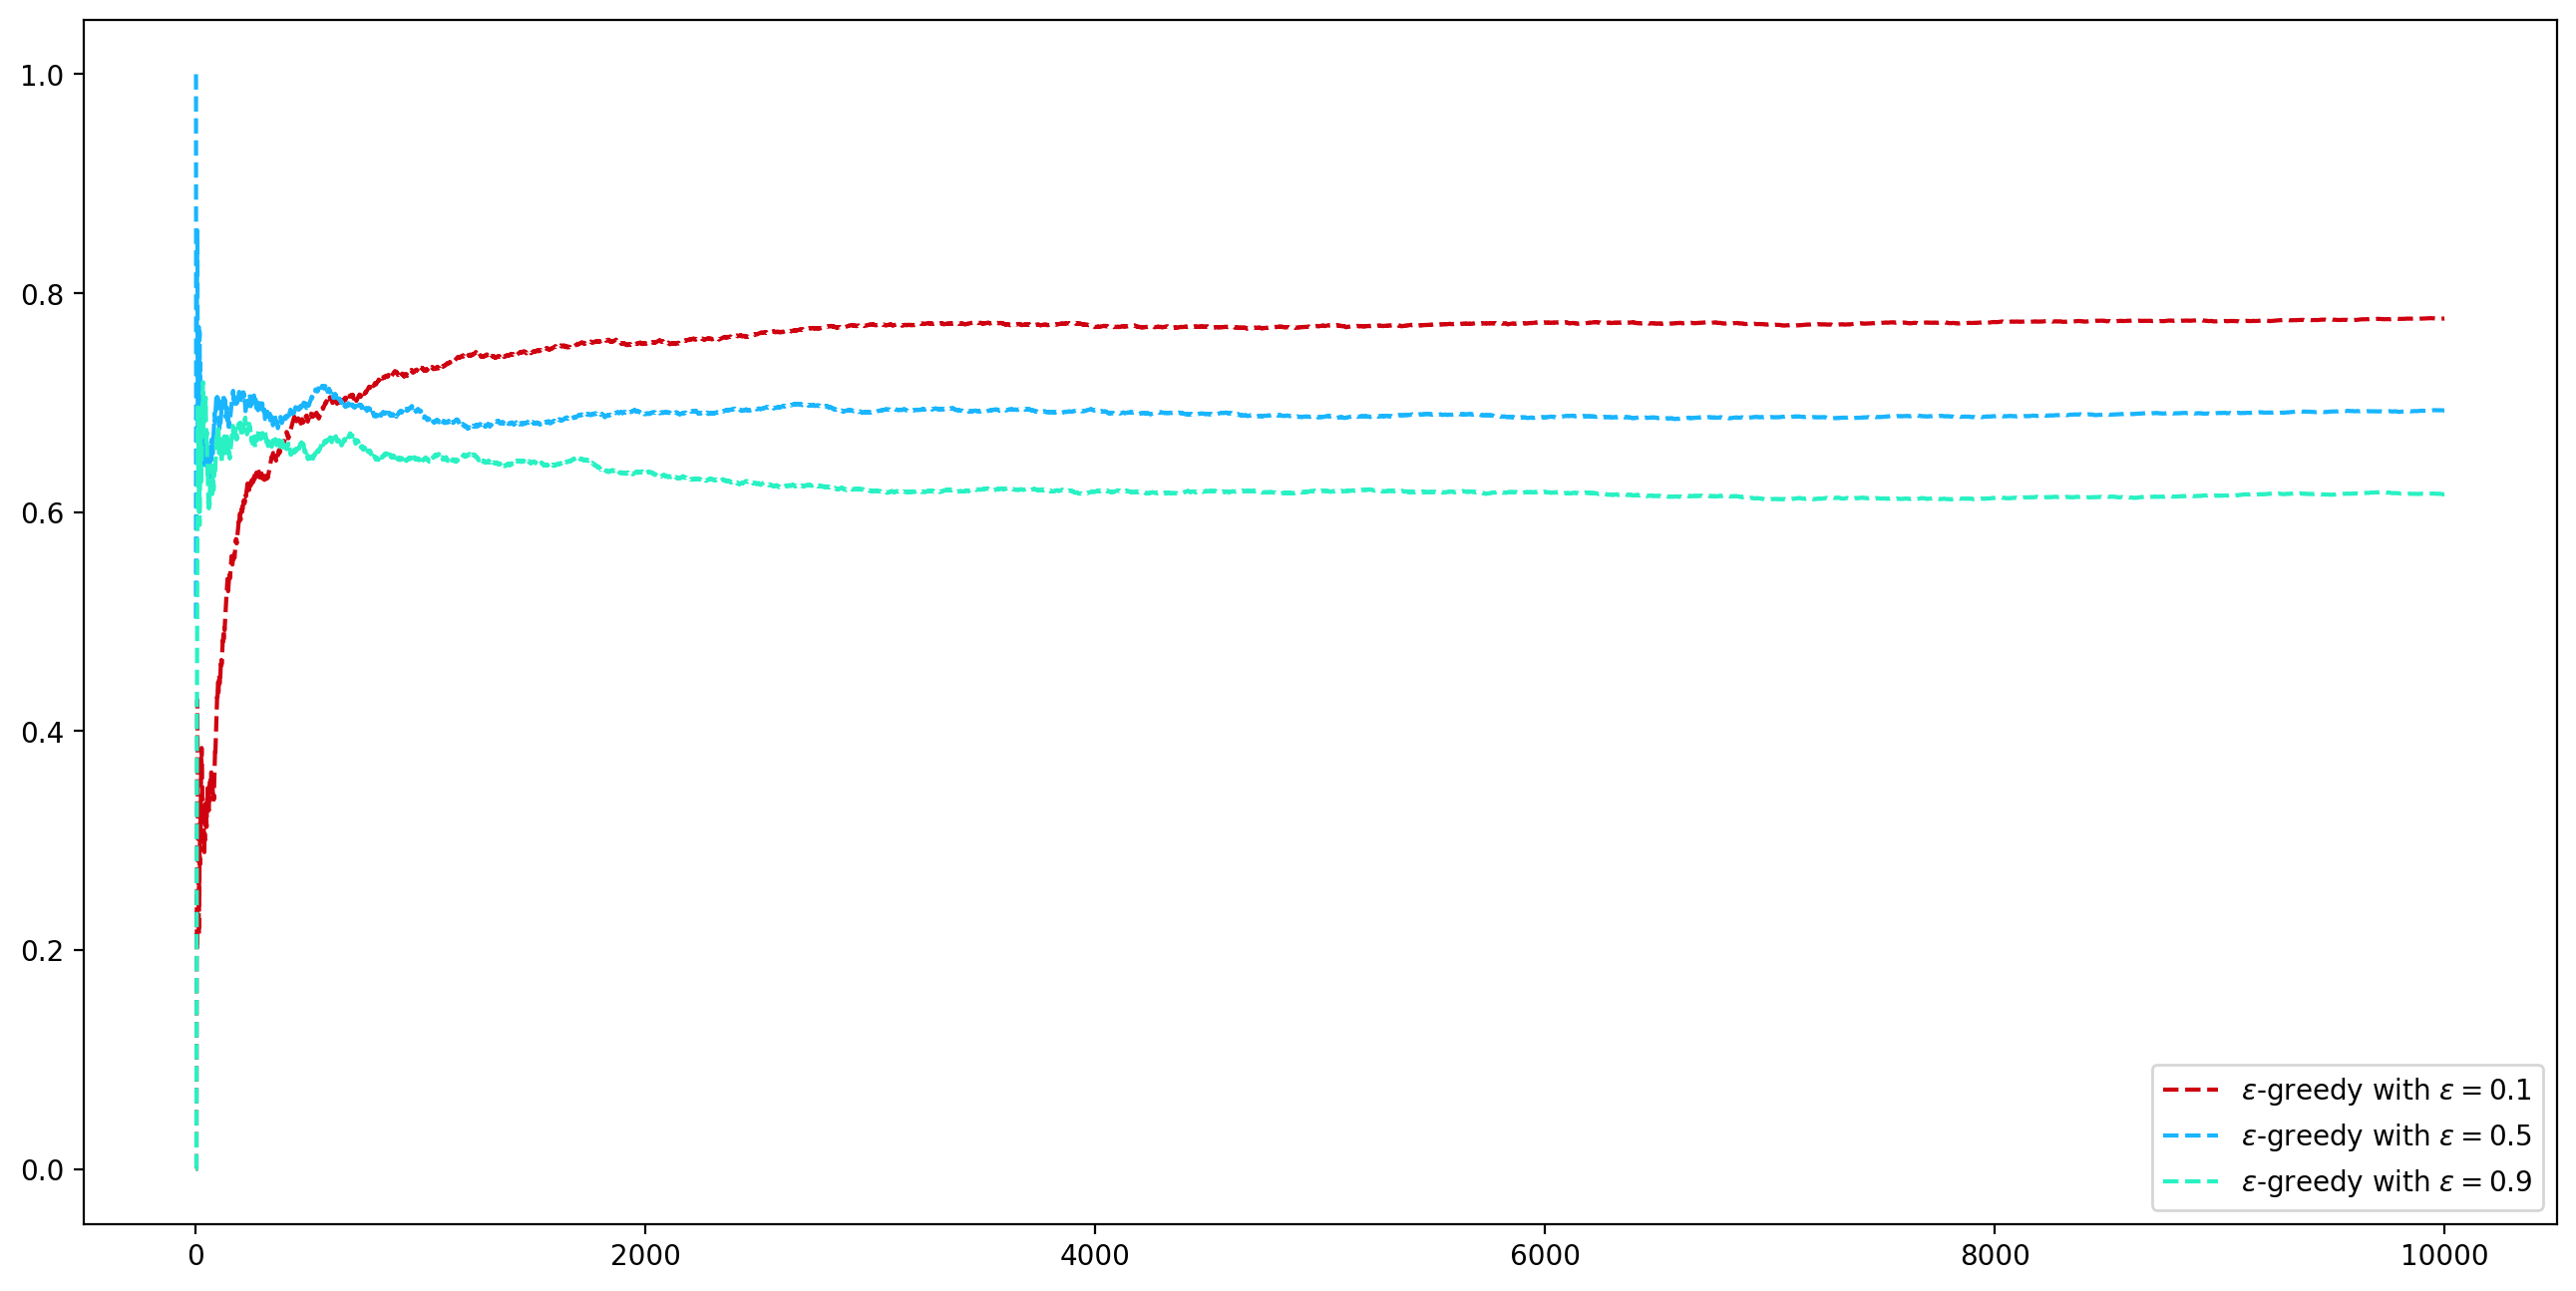

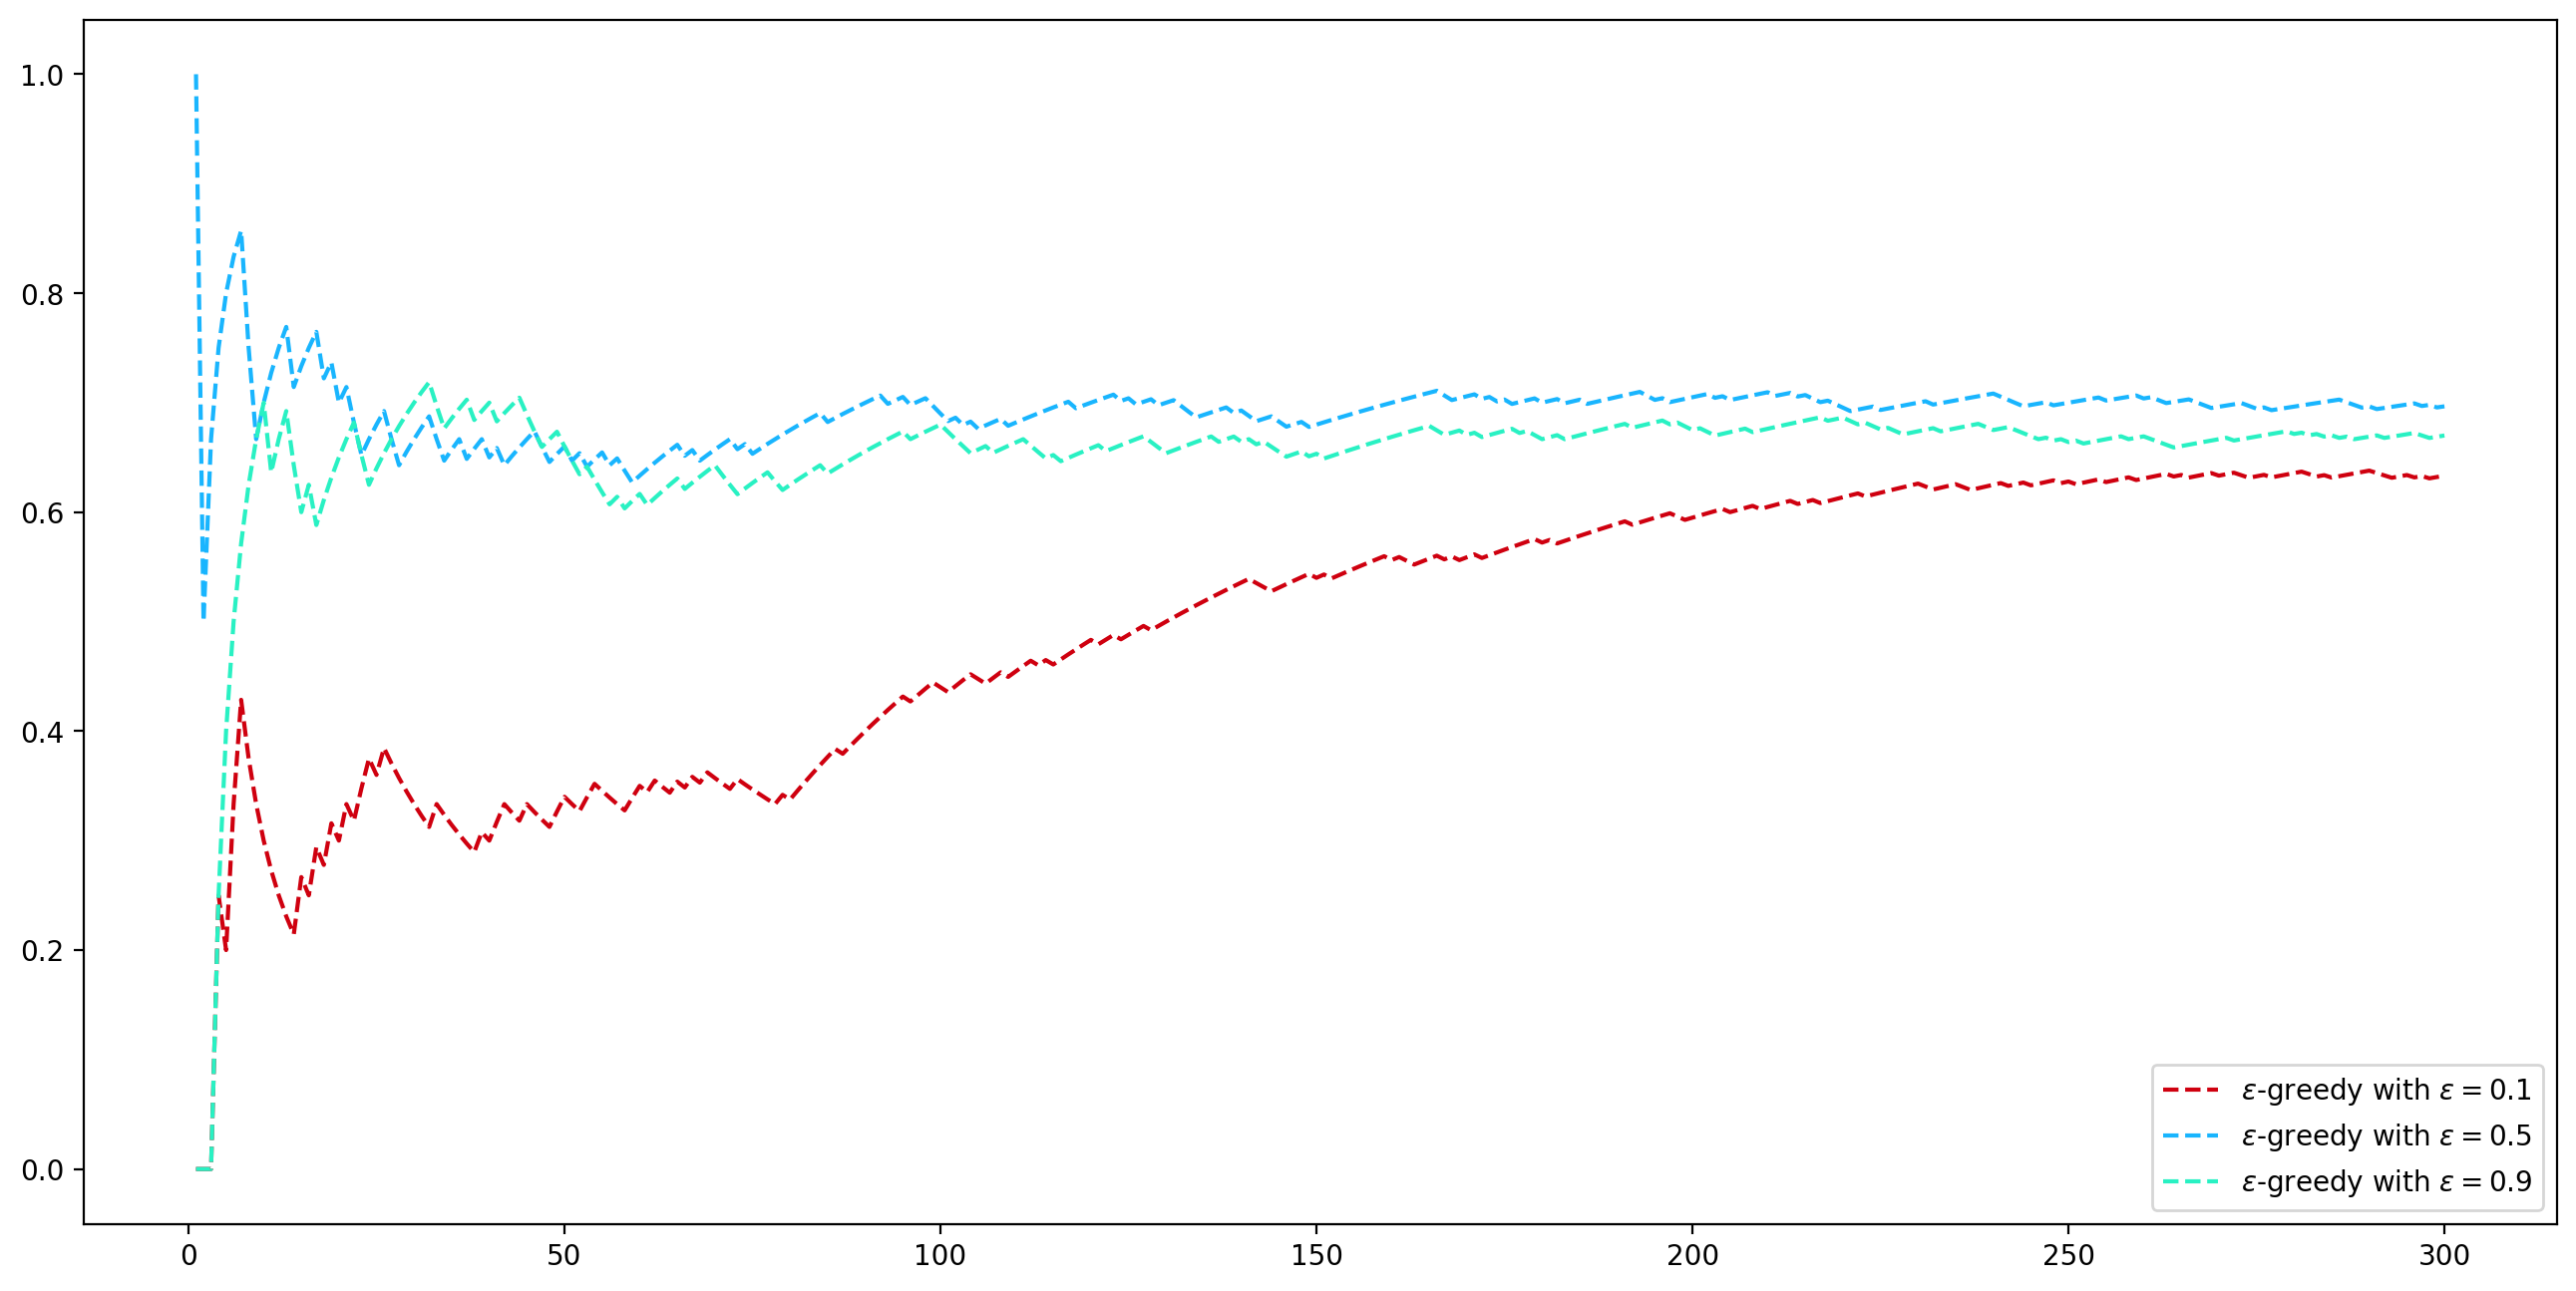

In [6]:
from simulator import Simulator
from epsilon_greedy_agent import EpsilonGreedyAgent


agent1 = EpsilonGreedyAgent(epsilon=0.1)
agent2 = EpsilonGreedyAgent(epsilon=0.5)
agent3 = EpsilonGreedyAgent(epsilon=0.9)

sim = Simulator(number_of_time_slot=10000)
sim.run_agent(agent1)
sim.run_agent(agent2)
sim.run_agent(agent3)

sim.plot()

# UCB simulations

# Thompson sampling simulations